In [ ]:
pip install numpy pandas scikit-learn matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [5]:
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = y

In [7]:
print("Iris Dataset:")
print(df.head())

Iris Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [17]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred = model.predict(X_test)

In [21]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 100.00%


In [23]:
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

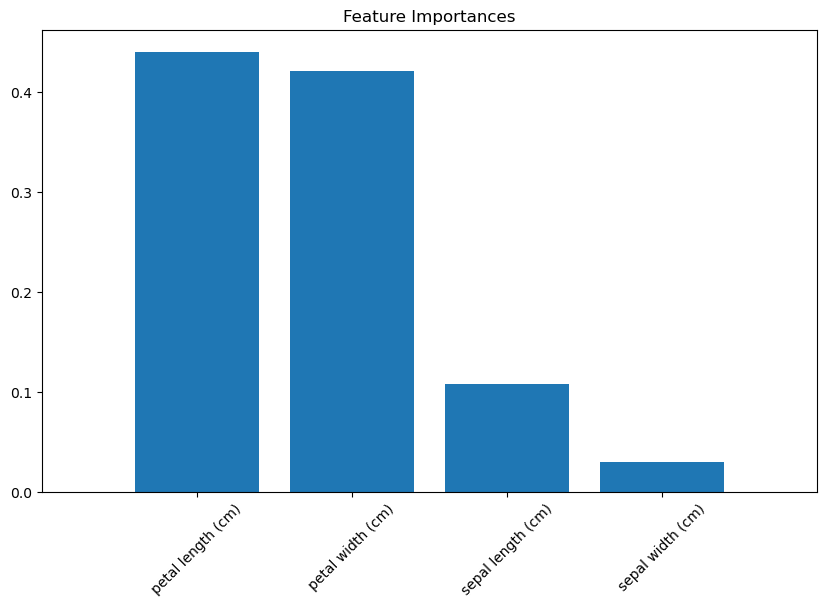

In [25]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(iris.feature_names)[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()